In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pickle

In [2]:
def substract_peds(row):
    return row - np.argmax(np.bincount(row))

def fast_plot(data, ax):
    ax.plot(data.transpose())
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");

def flatten_property(peaks, property):
    flat = []
    for i in range(0, len(peaks['properties'])):
        flat.extend(peaks['properties'][i][property])
    return np.array(flat)

In [3]:
data_folder = '/Users/emiliebertholet/cernbox/coldbox_data'
peak_folder = 'data_tests'

In [4]:
filename = f'{data_folder}/adc_data_run_25036_ch_40_all.npy' # neutrons
n_data = np.load(filename, allow_pickle=True).astype(np.int16)
n_data = np.apply_along_axis(substract_peds, axis=1, arr=n_data)

with open(f'{peak_folder}/peaks_neutrons_wlenNone.pkl', 'rb') as file:
    n_peaks = pickle.load(file)

print('PNS')
print(n_data.shape)
print(n_peaks.keys())
print(len(n_peaks['flat_peak_indices']))

PNS
(16600, 65536)
dict_keys(['mask', 'row_peak_indices', 'properties', 'flat_peak_indices'])
150242


In [5]:
filename = f'{data_folder}/adc_data_run_25036_ch_40_all.npy' # neutrons
sn_data = np.load(filename, allow_pickle=True).astype(np.int16)
sn_data = np.apply_along_axis(substract_peds, axis=1, arr=sn_data)
sn_data = n_data[:, 3000:6000]

with open(f'{peak_folder}/peaks_neutronsSel_wlenNone.pkl', 'rb') as file:
    sn_peaks = pickle.load(file)

print('PNS neutron sel')
print(sn_data.shape)
print(sn_peaks.keys())
print(len(sn_peaks['flat_peak_indices']))

PNS neutron sel
(16600, 3000)
dict_keys(['mask', 'row_peak_indices', 'properties', 'flat_peak_indices'])
14954


In [6]:
filename = f'{data_folder}/adc_data_run_25066_ch_40_all.npy' # cosmics
c_data = np.load(filename, allow_pickle=True).astype(np.int16)
c_data = np.apply_along_axis(substract_peds, axis=1, arr=c_data)

with open(f'{peak_folder}/peaks_cosmics_wlenNone.pkl', 'rb') as file:
    c_peaks = pickle.load(file)

print(c_data.shape)
print(c_peaks.keys())
print(len(c_peaks['flat_peak_indices']))

(4200, 262144)
dict_keys(['mask', 'row_peak_indices', 'properties', 'flat_peak_indices'])
64632


Text(0.5, 1.0, 'Neutrons')

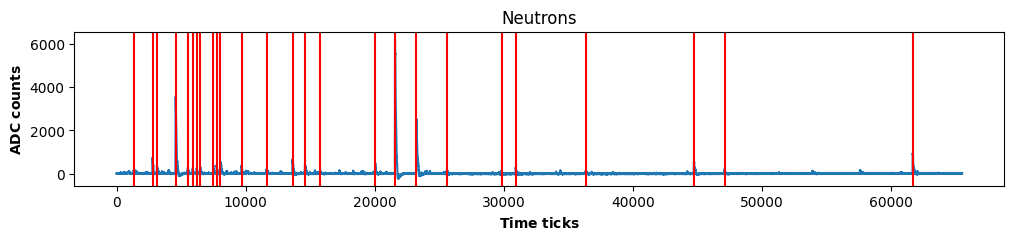

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(12, 2))
fast_plot(n_data[0], axs)
for p in n_peaks['row_peak_indices'][0]:
    axs.axvline(x = p, color = 'r')
axs.set_title('Neutrons')

Text(0.5, 1.0, 'Neutron Sel.')

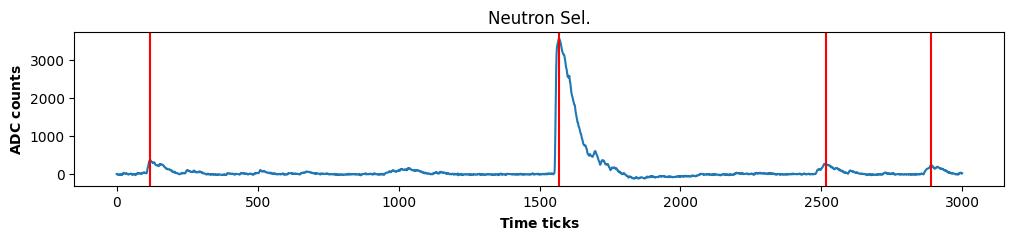

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(12, 2))
fast_plot(sn_data[0], axs)
for p in sn_peaks['row_peak_indices'][0]:
    axs.axvline(x = p, color = 'r')
axs.set_title('Neutron Sel.')

Text(0.5, 1.0, 'Cosmics')

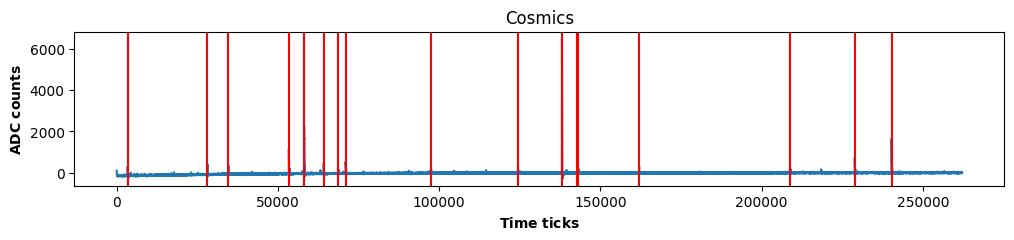

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(12, 2))
fast_plot(c_data[0], axs)
for p in c_peaks['row_peak_indices'][0]:
    axs.axvline(x = p, color = 'r')
axs.set_title('Cosmics')

Text(0.5, 1.0, 'Neutrons')

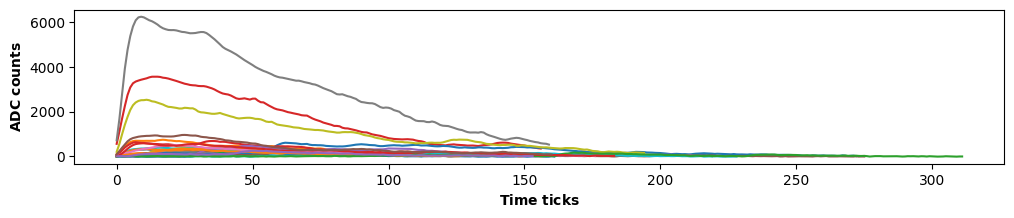

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 2))
trigger_idx = 0
for i in np.arange(0, len(n_peaks['properties'][trigger_idx]['left_ips']), 1):
    l = int(np.ceil(n_peaks['properties'][trigger_idx]['left_ips'][i]))
    r = int(np.ceil(n_peaks['properties'][trigger_idx]['right_ips'][i]))
    ax.plot(n_data[trigger_idx][l:r].transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title('Neutrons')

Text(0.5, 1.0, 'Neutron Sel')

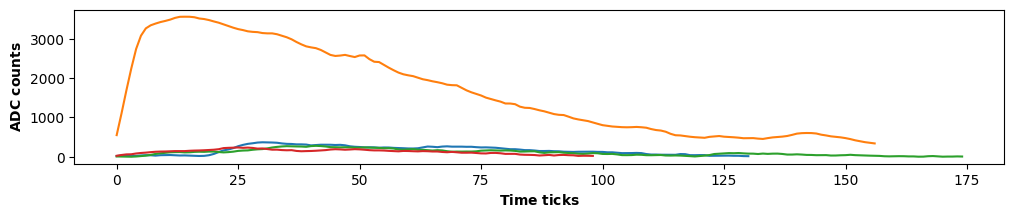

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 2))
trigger_idx = 0
for i in np.arange(0, len(sn_peaks['properties'][trigger_idx]['left_ips']), 1):
    l = int(np.ceil(sn_peaks['properties'][trigger_idx]['left_ips'][i]))
    r = int(np.ceil(sn_peaks['properties'][trigger_idx]['right_ips'][i]))
    ax.plot(sn_data[trigger_idx][l:r].transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
axs.set_title('Neutron Sel')

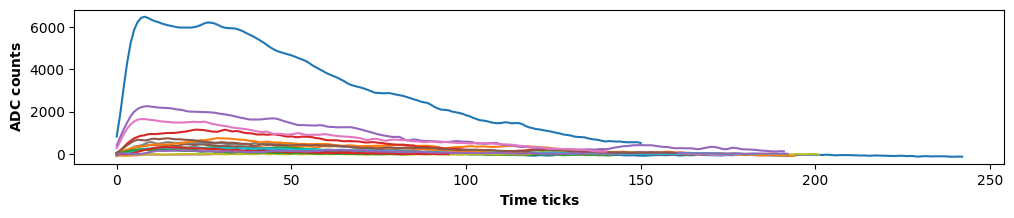

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12, 2))
trigger_idx = 0
for i in np.arange(0, len(c_peaks['properties'][trigger_idx]['left_ips']), 1):
    l = int(np.ceil(c_peaks['properties'][trigger_idx]['left_ips'][i]))
    r = int(np.ceil(c_peaks['properties'][trigger_idx]['right_ips'][i]))
    ax.plot(c_data[trigger_idx][l:r].transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
axs.set_title('Cosmics');

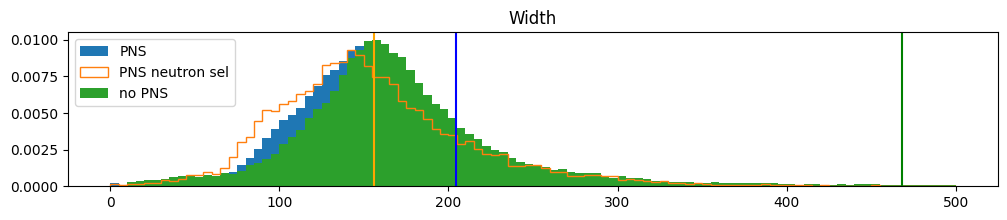

In [13]:
# rg=None
rg=(0, 500)
den=True
fig, ax = plt.subplots(1, 1, figsize=(12, 2))
ax.hist(flatten_property(n_peaks, 'widths'), bins=100, label='PNS', range=rg, density=den);
ax.hist(flatten_property(sn_peaks, 'widths'), bins=100, label='PNS neutron sel', range=rg, histtype='step', density=den);
ax.hist(flatten_property(c_peaks, 'widths'), bins=100, label='no PNS', range=rg, density=den);

ax.axvline(x = flatten_property(n_peaks, 'widths').mean(), color = 'b');
ax.axvline(x = flatten_property(sn_peaks, 'widths').mean(), color = 'orange');
ax.axvline(x = flatten_property(c_peaks, 'widths').mean(), color = 'g');
ax.legend();
ax.set_title('Width');


In [17]:
def check_peak_width(peaks, cut=600):
    print(f"mean = {flatten_property(peaks, 'widths').mean():.2f}     std = {flatten_property(peaks, 'widths').std():.2f}")
    print(f"min  = {flatten_property(peaks, 'widths').min():.2f}      max = {flatten_property(peaks, 'widths').max():.2f}")
    print(f"Found {(flatten_property(peaks, 'widths')<0).sum()} negative widths  (sanity check)")
    print(f"Pecentage of entries with a width > {cut} = {(flatten_property(peaks, 'widths')>cut).sum()*100/len(flatten_property(peaks, 'widths')):.2f} %")
    

In [19]:
print('neutrons')
check_peak_width(n_peaks, cut=600)
print('\nneutron sel')
check_peak_width(sn_peaks, cut=600)
print('\ncosmcis')
check_peak_width(c_peaks, cut=600)

neutrons
mean = 204.68     std = 581.82
min  = 1.49      max = 15413.60
Found 0 negative widths  (sanity check)
Pecentage of entries with a width > 600 = 0.76 %

neutron sel
mean = 155.85     std = 62.46
min  = 2.26      max = 1711.22
Found 0 negative widths  (sanity check)
Pecentage of entries with a width > 600 = 0.05 %

cosmcis
mean = 468.26     std = 1621.04
min  = 3.53      max = 69377.60
Found 0 negative widths  (sanity check)
Pecentage of entries with a width > 600 = 6.90 %
